## FIFA 21 - 1 DAY PROJECT
**Group: Imanol Laconcha, Jorge Palacios, Elena Salgueiro**

**Day_1_Week_2 Ironhack Data Analytics Bootcamp**

We have access to data regarding professional football player´s persona and professional skills information.
The data is provided in a csv table with the following features:
The goal of this project is to build a linear regression model so we can predict a FIFA player´s 'Overall Rating Score'(OVA from now on).

In [ ]:
#Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [7]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Getting dataset
file= pd.read_csv('fifa21_training.csv')
file.shape
file.columns.values

array(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Club', 'BP',
       'Position', 'Team & Contract', 'Height', 'Weight', 'foot',
       'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed',
       'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality',
       'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR',
       'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS'

In [4]:
#Split the data
y = file['OVA']
X = file.drop(['OVA'], axis=1)

In [5]:
#Split data into numerical and categorical.
X_num = X.select_dtypes(include= np.number)
X_cat = X.select_dtypes(include = object)

In [8]:
#Let´s explore de numerical variables.
X_num.T
X_num.columns

,0,1,2,3,4,5,6,7,8,9,...,13690,13691,13692,13693,13694,13695,13696,13697,13698,13699
Unnamed: 0,1954.0,2225.0,1959.0,9815.0,10074.0,1740.0,1957.0,16647.0,7770.0,1602.0,...,11363.0,14423.0,4426.0,16850.0,6265.0,11284.0,11964.0,5390.0,860.0,15795.0
ID,184383.0,188044.0,184431.0,233796.0,234799.0,182411.0,184392.0,257768.0,225013.0,179698.0,...,239358.0,250976.0,204776.0,258428.0,215480.0,239074.0,241223.0,210930.0,162993.0,254882.0
Age,26.0,30.0,33.0,22.0,23.0,33.0,30.0,22.0,34.0,35.0,...,25.0,21.0,29.0,17.0,24.0,21.0,21.0,27.0,34.0,18.0
Growth,1.0,0.0,0.0,13.0,8.0,0.0,0.0,7.0,0.0,0.0,...,5.0,9.0,0.0,24.0,4.0,11.0,9.0,0.0,0.0,16.0
Attacking,258.0,365.0,336.0,242.0,249.0,328.0,325.0,262.0,277.0,306.0,...,75.0,244.0,244.0,171.0,308.0,197.0,77.0,332.0,268.0,276.0
Crossing,54.0,66.0,73.0,44.0,49.0,69.0,69.0,58.0,54.0,73.0,...,7.0,58.0,49.0,48.0,71.0,59.0,13.0,76.0,58.0,49.0
Finishing,47.0,79.0,76.0,42.0,37.0,64.0,55.0,56.0,46.0,56.0,...,9.0,26.0,30.0,23.0,64.0,23.0,9.0,72.0,44.0,54.0
Heading Accuracy,43.0,76.0,34.0,58.0,61.0,64.0,68.0,42.0,70.0,65.0,...,20.0,71.0,75.0,32.0,53.0,42.0,14.0,34.0,61.0,51.0
Short Passing,70.0,68.0,78.0,62.0,68.0,72.0,74.0,68.0,63.0,63.0,...,31.0,54.0,60.0,44.0,67.0,51.0,34.0,79.0,62.0,70.0
Volleys,44.0,76.0,75.0,36.0,34.0,59.0,59.0,38.0,44.0,49.0,...,8.0,35.0,30.0,24.0,53.0,22.0,7.0,71.0,43.0,52.0


Index(['Unnamed: 0', 'ID', 'Age', 'Growth', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')


We find that some variables are included in other global variables (ie: Attacking = 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys') These global variables are Skill, Movement, Power, Mentality, Defending, Goalkeeping.

But also find out that the sum of these global variables is the value of TOTAL STATS.

Moreover, we find out that BASE STATS is the sum of PAC, SHO, PAS, DRI, DEF, PHY

To avoid redundant variables we will just keep 'base stats' and 'total stats' that contains all the info.

In [10]:
#Acording to that we clean our numerical variables
X_num_sum = X_num[['Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping']]
X_num_mean = X_num[['PAC', 'SHO', 'PAS', 'DRI', 'DEF','PHY']]
X_cat1 = X_cat[['Height', 'Weight', 'foot','Value','Wage', 'Release Clause','W/F', 'SM', 'A/W', 'D/W',
       'IR', 'Hits']]

In [11]:
#There are not NaN values.
X_num_sum.isna().sum()

Attacking      0
Skill          0
Movement       0
Power          0
Mentality      0
Defending      0
Goalkeeping    0
dtype: int64

In [12]:
# Now let´s explore our categorical variables
X_cat.T
X_cat.columns

,0,1,2,3,4,5,6,7,8,9,...,13690,13691,13692,13693,13694,13695,13696,13697,13698,13699
Name,A. Pasche,Alan Carvalho,S. Giovinco,J. Evans,Y. Demoncy,Yu Hanchao,M. Darmian,N. Mosti,M. Čovilo,L. Grimi,...,S. Dieng,L. Bessilé,T. Leistner,L. Florică,A. Boljević,S. Aw,S. Mogi,Carles Gil,J. Perch,A. Oeynhausen
Nationality,Switzerland,China PR,Italy,Wales,France,China PR,Italy,Italy,Bosnia Herzegovina,Argentina,...,Senegal,France,Germany,Romania,Montenegro,Senegal,Japan,Spain,England,Germany
Club,FC Lausanne-Sport,Beijing Sinobo Guoan FC,Al Hilal,Swansea City,US Orléans Loiret Football,Shanghai Greenland Shenhua FC,Parma,AC Monza,FC Lugano,Club Atlético Huracán,...,Queens Park Rangers,FC Girondins de Bordeaux,Hamburger SV,FC Hermannstadt,Standard de Liège,Gil Vicente FC,Cerezo Osaka,New England Revolution,Mansfield Town,SC Paderborn 07
BP,CM,ST,CAM,CDM,CDM,LM,RB,LM,CB,CB,...,GK,CB,CB,LB,RM,LB,GK,RM,CDM,CAM
Position,CM CDM,ST LW LM,CAM CF,CDM CM,CDM CM,LM LW RW,RB LB,CAM,CDM CB,LB CB,...,GK,CB LB,CB,LB,RW LW,LB,GK,RM CAM CM,CDM RB CM,CM
Team & Contract,FC Lausanne-Sport 2015 ~ 2020,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",Al Hilal 2019 ~ 2022,Swansea City 2016 ~ 2021,US Orléans Loiret Football 2018 ~ 2021,Shanghai Greenland Shenhua FC 2020 ~ 2023,Parma 2019 ~ 2023,AC Monza 2019 ~ 2024,FC Lugano 2018 ~ 2021,Club Atlético Huracán 2020 ~ 2021,...,Queens Park Rangers 2016 ~ 2024,FC Girondins de Bordeaux 2020 ~ 2022,Hamburger SV 2020 ~ 2022,FC Hermannstadt 2020 ~ 2022,Standard de Liège 2019 ~ 2023,Gil Vicente FC 2020 ~ 2023,Cerezo Osaka 2017 ~ 2021,New England Revolution 2019 ~ 2024,Mansfield Town 2020 ~ 2021,SC Paderborn 07 2020 ~ 2022
Height,"5'9""","6'0""","5'4""","5'10""","5'11""","5'10""","6'0""","5'10""","6'4""","6'0""",...,"6'4""","6'0""","6'3""","5'11""","6'0""","5'8""","6'5""","5'7""","5'11""","5'10"""
Weight,161lbs,159lbs,134lbs,152lbs,150lbs,154lbs,154lbs,161lbs,192lbs,163lbs,...,198lbs,176lbs,192lbs,143lbs,174lbs,143lbs,176lbs,146lbs,176lbs,150lbs
foot,Right,Right,Right,Right,Right,Right,Right,Left,Right,Left,...,Right,Left,Right,Right,Right,Left,Right,Left,Right,Right
Joined,"Jul 1, 2015","Jan 16, 2015","Jan 31, 2019","Jul 1, 2016","Jul 1, 2018","Jul 18, 2020","Sep 2, 2019","Aug 2, 2019","Aug 30, 2018","Jan 27, 2020",...,"Aug 26, 2016","Jul 1, 2020","Aug 28, 2020","Aug 16, 2020","Jul 1, 2019","Aug 9, 2020","Jan 1, 2017","Feb 13, 2019","Aug 13, 2020","Jan 1, 2020"


Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'GK'],
      dtype='object')

In [13]:
#Analysing our categorical data we think that there are some features that are not interesting for this project because
#they should not explain our target value. Features like the name of the player, Nationality, the club he belongs to or data
#and features releated to the contract are not decisive for our goal. We drop this features from our data set.

#Let´s do some data cleaning making data homogenious

X_cat1["Height"] = X_cat1["Height"].replace({"'":"."},regex=True)
X_cat1["Height"] = X_cat1["Height"].replace({'"':''},regex=True)

X_cat1["Weight"] = X_cat1["Weight"].replace({'lbs':""},regex=True)

X_cat1["Value"] = X_cat1["Value"].replace({'€':''},regex=True)
X_cat1["Wage"] = X_cat1["Wage"].replace({'€':''},regex=True)
X_cat1["Release Clause"] = X_cat1["Release Clause"].replace({'€':''},regex=True)

X_cat1["W/F"] = X_cat1["W/F"].replace({'★':""},regex=True)
X_cat1["SM"] = X_cat1["SM"].replace({'★':""},regex=True)
X_cat1["IR"] = X_cat1["IR"].replace({'★':""},regex=True)

X_cat1.head()

C:\Users\Elena\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Elena\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Elena\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Height,Weight,foot,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
0,5.9,161,Right,525K,4K,801K,4,2,High,Medium,1,3
1,6.0,159,Right,8.5M,23K,0,3,4,High,Low,2,44
2,5.4,134,Right,9M,49K,15.3M,4,4,High,Medium,2,73
3,5.10,152,Right,275K,4K,694K,2,2,Medium,Medium,1,7
4,5.11,150,Right,725K,2K,1.4M,2,3,Low,Medium,1,4


In [15]:
#More data cleaning
def MK(X):
    if isinstance(X, str):
        if 'K' in X:
          X = X.replace('K','')
          X = float(X)
          X = X*1000
          return X
        elif 'M' in X:
          X = X.replace('M','')
          X = float(X)
          X = X*1000000
          return X
    else:
        if isinstance(X, float):
          return X
X_cat1['Value'] = X_cat1['Value'].apply(MK)

X_cat1['Wage'] = X_cat1['Wage'].apply(MK)

X_cat1['Release Clause'] = X_cat1['Release Clause'].apply(MK)

X_cat1

C:\Users\Elena\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Elena\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Elena\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,Height,Weight,foot,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
0,5.9,161,Right,525000.0,4000.0,801000.0,4,2,High,Medium,1,3
1,6.0,159,Right,8500000.0,23000.0,NaN,3,4,High,Low,2,44
2,5.4,134,Right,9000000.0,49000.0,15300000.0,4,4,High,Medium,2,73
3,5.10,152,Right,275000.0,4000.0,694000.0,2,2,Medium,Medium,1,7
4,5.11,150,Right,725000.0,2000.0,1400000.0,2,3,Low,Medium,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
13695,5.8,143,Left,325000.0,1000.0,731000.0,3,2,High,Medium,1,4
13696,6.5,176,Right,190000.0,NaN,285000.0,2,1,Medium,Medium,1,3
13697,5.7,146,Left,8000000.0,9000.0,12000000.0,4,4,High,Medium,2,15
13698,5.11,176,Right,140000.0,4000.0,245000.0,3,2,Medium,Medium,1,4


In [18]:
#One hot encoder (a way to turn categorical variables into multiple numerical columns)
encoded = OneHotEncoder().fit(pd.DataFrame(X_cat1['foot'])).transform(pd.DataFrame(X_cat1['foot'])).toarray()
foot_encoded = pd.DataFrame(encoded,columns=['left','right'])

In [19]:
#Label encoder ( label catergorical data to turn it to numerical)
X_lab_encoderA = LabelEncoder().fit(X_cat1['A/W']).transform(X_cat1['A/W'])
X_lab_encoderA = pd.DataFrame(X_lab_encoderA, columns=['A/W'])

X_lab_encoderD = LabelEncoder().fit(X_cat1['D/W']).transform(X_cat1['D/W'])
X_lab_encoderD = pd.DataFrame(X_lab_encoderD, columns=['D/W'])

In [ ]:
#Cleaning Hits columns
#X_cat2 = X_cat2.drop([212],axis=0)
#X_cat2 = X_cat2.drop([13516],axis=0)
#X_cat2.head()

In [20]:
#Columns with we are not able to deal with :(
X_cat_num = X_cat1.drop(['Value','Wage','Release Clause','Hits','A/W','D/W','foot'], axis=1)

In [21]:
#All the categorical columns to numeric.
X_cat_num['Height'] = pd.to_numeric(X_cat_num['Height'])
X_cat_num['Weight'] = pd.to_numeric(X_cat_num['Weight'])
X_cat_num['W/F'] = pd.to_numeric(X_cat_num['W/F'])
X_cat_num['SM'] = pd.to_numeric(X_cat_num['SM'])
X_cat_num['IR'] = pd.to_numeric(X_cat_num['IR'])

In [22]:
X_cat_num = pd.DataFrame(X_cat_num)
X_cat_num.head()

,Height,Weight,W/F,SM,IR
0,5.90,161,4,2,1
1,6.00,159,3,4,2
2,5.40,134,4,4,2
3,5.10,152,2,2,1
4,5.11,150,2,3,1


In [23]:
#Concatenate numerical and categorical df.
X_con = pd.concat([X_num_sum,X_cat_num,X_lab_encoderA,X_lab_encoderD,foot_encoded], axis=1)
X_con.head()

,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Height,Weight,W/F,SM,IR,A/W,D/W,left,right
0,258,286,346,306,290,148,48,5.90,161,4,2,1,0,2,0.0,1.0
1,365,375,404,372,313,77,55,6.00,159,3,4,2,0,1,0.0,1.0
2,336,424,424,308,332,80,21,5.40,134,4,4,2,0,2,0.0,1.0
3,242,259,282,277,257,168,42,5.10,152,2,2,1,2,2,0.0,1.0
4,249,280,324,280,294,185,52,5.11,150,2,3,1,1,2,0.0,1.0


<Figure size 1200x640 with 0 Axes>

<AxesSubplot:>

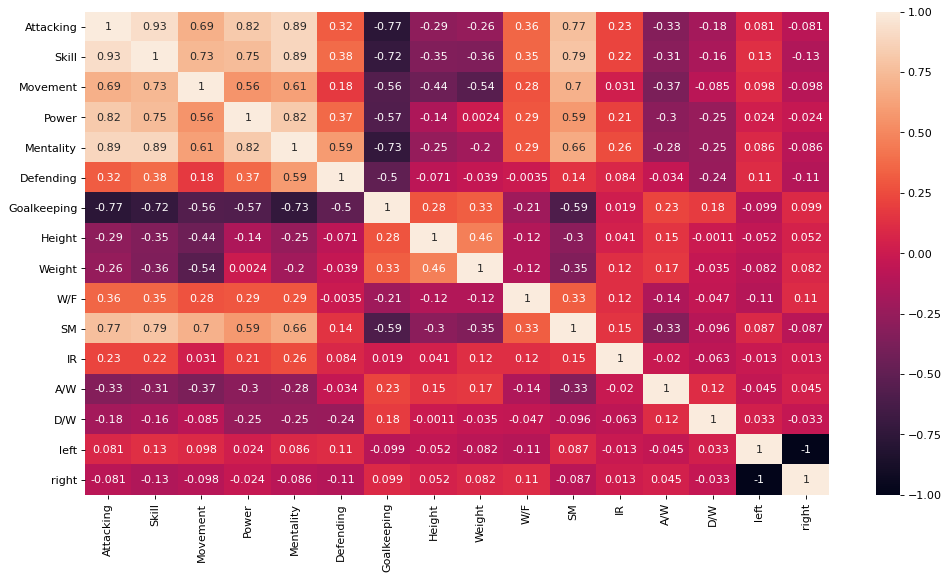

In [24]:
#Let´s explore correlation among the variables
cormat = X_con.corr()
plt.figure(figsize=(15,8), dpi=80)
sns.heatmap(cormat, annot=True)

In [25]:
X_con.describe()

,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Height,Weight,W/F,SM,IR,A/W,D/W,left,right
count,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,258.313431,266.382993,322.597007,302.159343,261.734891,140.876934,78.039343,5.798675,165.642190,2.984234,2.449927,1.149781,1.350292,1.553869,0.246569,0.753431
std,72.412379,77.062358,55.200803,49.586804,63.144215,61.588754,81.789044,0.450179,15.810987,0.675486,0.781784,0.455049,0.917740,0.775531,0.431030,0.431030
min,33.000000,43.000000,113.000000,133.000000,55.000000,17.000000,12.000000,5.100000,117.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,231.000000,232.000000,294.000000,271.000000,235.000000,83.000000,48.000000,5.110000,154.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,271.000000,279.000000,331.000000,308.000000,270.000000,157.000000,53.000000,5.900000,165.000000,3.000000,2.000000,1.000000,2.000000,2.000000,0.000000,1.000000
75%,306.000000,319.000000,361.000000,339.000000,304.000000,194.000000,59.000000,6.100000,176.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,1.000000
max,437.000000,470.000000,464.000000,444.000000,421.000000,272.000000,439.000000,6.900000,243.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [26]:
len(X_con['Attacking'])

13700

In [27]:
X_con.shape

(13700, 16)

In [28]:
#Training model
X_train, X_test, y_train, y_test = train_test_split(X_con, y, test_size=0.20, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10960, 16)
(2740, 16)
(10960,)
(2740,)


In [29]:
model = linear_model.LinearRegression().fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

-0.8245234898727318
[ 6.46728224e-02  1.21973307e-03  2.89067109e-02  2.32768329e-02
  2.35931512e-03  4.45381040e-02  8.65070524e-02  1.05602520e+00
  5.48280935e-02  1.06222600e-01  1.01263895e+00  2.60607807e+00
  2.18787781e-02 -1.71364589e-01 -3.99587075e-03  3.99587075e-03]


In [30]:
predictions = model.predict(X_test)

In [31]:
r2 = r2_score(y_test, predictions)
r2

0.7573695702616141

In [32]:
mse = mean_squared_error(y_test, predictions)
print(mse)

11.234686657917118


In [33]:
rmse = math.sqrt(mse)
print(rmse)

3.3518184106417697


In [193]:
import pickle
pickle.dump(model,open('model.p','wb'))